In [25]:
#Importing Libraries
import pandas as pd
import numpy as np
import pickle

In [26]:
#Reading dataset
dataset = pd.read_csv("Kidney_data.csv")

In [27]:
#displaying dataset
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [28]:
#dropping column id
dataset = dataset.drop('id', axis=1)

In [29]:
# Replacing Categorical Values with Numericals
dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})
dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})
dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})

dataset['dm'] = dataset['dm'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})
dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})

dataset['cad'] = dataset['cad'].replace(to_replace = {'\tno':'no'})
dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})

dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})
dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})

dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd'})
dataset["classification"] = [1 if i == "ckd" else 0 for i in dataset["classification"]]

In [30]:
# Coverting Objective into Numericals:
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')

In [31]:
# Handling Missing Values:
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']
for feature in features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())

In [32]:
# Dropping feature (Multicollinearity):
dataset.drop('pcv', axis=1, inplace=True)

In [33]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

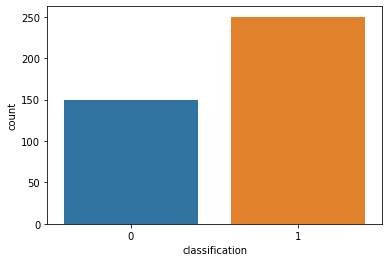

In [34]:
# Target feature:
sns.countplot(dataset['classification'])

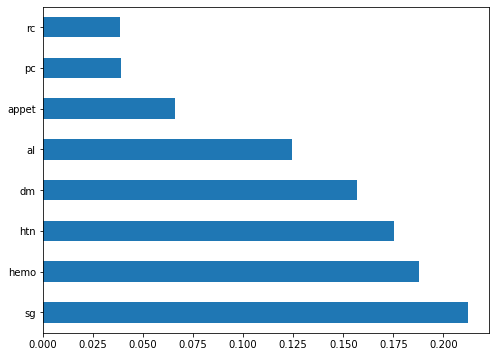

In [35]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

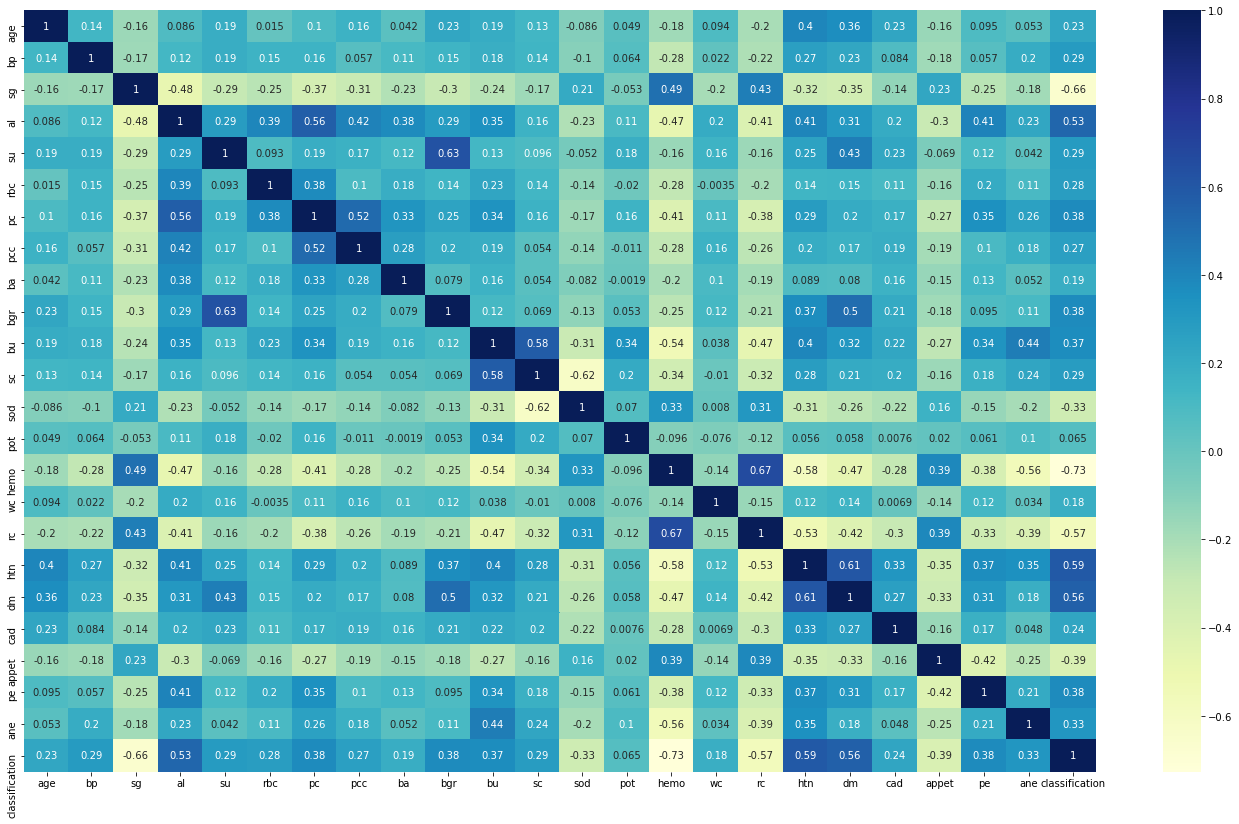

In [36]:
plt.figure(figsize=(24,14))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [37]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [38]:
# After feature importance:
X = dataset[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]

In [39]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [40]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)
RandomForest

RandomForestClassifier()

In [41]:
y_pred = RandomForest.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test,y_pred))

Accuracy: 0.975


In [43]:
filename = 'Kidney.pkl'
pickle.dump(RandomForest, open(filename, 'wb'))

In [44]:
X

,sg,htn,hemo,dm,al,appet,rc,pc
0,1.020,1.0,15.4,1.0,1.0,1.0,5.2,0.0
1,1.020,0.0,11.3,0.0,4.0,1.0,4.8,0.0
2,1.010,0.0,9.6,1.0,2.0,0.0,4.8,0.0
3,1.005,1.0,11.2,0.0,4.0,0.0,3.9,1.0
4,1.010,0.0,11.6,0.0,2.0,1.0,4.6,0.0
...,...,...,...,...,...,...,...,...
395,1.020,0.0,15.7,0.0,0.0,1.0,4.9,0.0
396,1.025,0.0,16.5,0.0,0.0,1.0,6.2,0.0
397,1.020,0.0,15.8,0.0,0.0,1.0,5.4,0.0
398,1.025,0.0,14.2,0.0,0.0,1.0,5.9,0.0


In [45]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [47]:
input_data=  (1.025,0.0,15.8,0.0,0.0,1.0,6.1,0.0)     
# Coverting into data to numpy array so as to avoid reshape error :
input_data_as_numpy_array = np.asarray(input_data)

# Reshapping the array :
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Interpreting the Predicted Result :
result = RandomForest.predict(input_data_reshaped)
result

array([0], dtype=int64)